In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc("font", family= 'Noto Sans CJK JP')

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from statsmodels.api import Logit

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,classification_report


In [ ]:
log_model=Logit.from_formula("""scale~ C(spec_long)+C(spec_country)+C(steel_kind)+pt_thick+pt_width+pt_length+C(hsb)+C(fur_no)+C(fur_input_row)+fur_heat_temp+fur_heat_time+fur_soak_time+fur_total_time+fur_ex_temp+C(rolling_method)+rolling_temp+descaling_count+C(work_group)""",x_train)


In [ ]:
log_result=log_model.fit()

Optimization terminated successfully.
         Current function value: 0.236357
         Iterations 30


In [ ]:
print(log_result.summary())

                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2605
Method:                           MLE   Df Model:                           17
Date:                Thu, 03 Aug 2023   Pseudo R-squ.:                  0.2298
Time:                        11:49:44   Log-Likelihood:                -619.97
converged:                       True   LL-Null:                       -804.91
Covariance Type:            nonrobust   LLR p-value:                 3.585e-68
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -5.0144      0.559     -8.976      0.000      -6.109      -3.919
C(REASON)[T.HomeImp]    -0.0213      0.177     -0.120      0.904      -0.368       0.326
C(JOB)[T.OTH

In [ ]:
log_model=Logit.from_formula("""BAD ~C(REASON)+DEROG+DELINQ+CLAGE+NINQ+CLNO+DEBTINC""",df_train)

In [ ]:
log_result=log_model.fit()

Optimization terminated successfully.
         Current function value: 0.242107
         Iterations 8


In [ ]:
print(log_result.summary())

                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2615
Method:                           MLE   Df Model:                            7
Date:                Thu, 03 Aug 2023   Pseudo R-squ.:                  0.2110
Time:                        11:50:03   Log-Likelihood:                -635.05
converged:                       True   LL-Null:                       -804.91
Covariance Type:            nonrobust   LLR p-value:                 1.951e-69
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -5.5012      0.494    -11.136      0.000      -6.469      -4.533
C(REASON)[T.HomeImp]     0.0242      0.171      0.141      0.888      -0.312       0.360
DEROG       

In [ ]:
y_pred_train= log_result.predict(df_train)

In [ ]:
y_pred_train_class=(y_pred_train>0.5).astype(int)
print("Test 예측 결과\n",y_pred_train_class.head(),"\n")
print("Confusion Matrix:\n{}".format(confusion_matrix(df_train["BAD"], y_pred_train_class)),"\n")

Test 예측 결과
 3164    0
3314    1
93      0
1456    0
3327    0
dtype: int64 

Confusion Matrix:
[[2371   11]
 [ 193   48]] 



In [ ]:
y_pred_test= log_result.predict(df_test)

In [ ]:
y_pred_test_class=(y_pred_test>0.5).astype(int)
print("Test 예측 결과\n",y_pred_test_class.head(),"\n")
print("Confusion Matrix:\n{}".format(confusion_matrix(df_test["BAD"], y_pred_test_class)),"\n")

Test 예측 결과
 1721    0
822     0
1686    0
789     0
165     0
dtype: int64 

Confusion Matrix:
[[1018    3]
 [  81   23]] 



In [ ]:
print("Train 예측/분류 결과")
print("Accuracy:{0:.3f}\n".format(accuracy_score(df_train["BAD"],y_pred_train_class)))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_train["BAD"], y_pred_train_class)),"\n")
print(classification_report(df_train["BAD"], y_pred_train_class, digits=3))

print("Test 예측/분류 결과")
print("Accuracy:{0:.3f}\n".format(accuracy_score(df_test["BAD"],y_pred_test_class)))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_test["BAD"], y_pred_test_class)),"\n")
print(classification_report(df_test["BAD"], y_pred_test_class, digits=3))

Train 예측/분류 결과
Accuracy:0.922

Confusion Matrix:
[[2371   11]
 [ 193   48]] 

              precision    recall  f1-score   support

           0      0.925     0.995     0.959      2382
           1      0.814     0.199     0.320       241

    accuracy                          0.922      2623
   macro avg      0.869     0.597     0.639      2623
weighted avg      0.915     0.922     0.900      2623

Test 예측/분류 결과
Accuracy:0.925

Confusion Matrix:
[[1018    3]
 [  81   23]] 

              precision    recall  f1-score   support

           0      0.926     0.997     0.960      1021
           1      0.885     0.221     0.354       104

    accuracy                          0.925      1125
   macro avg      0.905     0.609     0.657      1125
weighted avg      0.922     0.925     0.904      1125



<Axes: >

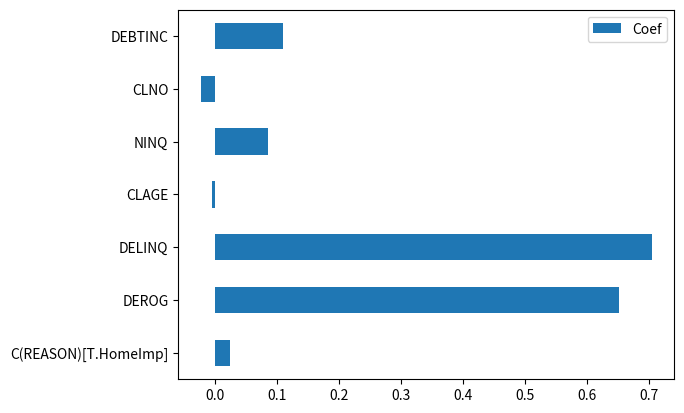

In [ ]:
df_logistic_coef=pd.DataFrame({"Coef": log_result.params.values[1:]}, index=log_model.exog_names[1:])
df_logistic_coef.plot.barh(y="Coef")

In [ ]:
df_char= df_raw.select_dtypes(include="object")
df_numeric=df_raw.select_dtypes(exclude="object")

In [ ]:
scaler=StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled= pd.DataFrame(np_numeric_scaled, columns= df_numeric.columns)

In [ ]:
df_scaled= pd.concat([df_numeric_scaled, df_char], axis=1)
df_scaled.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON,JOB
0,3.140664,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,HomeImp,Other
1,3.140664,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,HomeImp,Other
2,-0.318404,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,HomeImp,Office
3,3.140664,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,HomeImp,Mgr
4,-0.318404,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,HomeImp,Office


In [ ]:
df_scaled["BAD"]=np.where(df_scaled["BAD"]>0,1,0)

In [ ]:
df_scaled_train, df_scaled_test= train_test_split(df_scaled, test_size=0.3, random_state=1234)

In [ ]:
scaled_log_model=Logit.from_formula("""BAD ~LOAN+C(JOB)+DEROG+DELINQ+CLAGE+NINQ+CLNO+DEBTINC""",df_scaled_train)

In [ ]:
scaled_log_result=scaled_log_model.fit()

         Current function value: 0.236586
         Iterations: 35


/home/piai/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print(scaled_log_result.summary())

                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2609
Method:                           MLE   Df Model:                           13
Date:                Thu, 03 Aug 2023   Pseudo R-squ.:                  0.2290
Time:                        14:25:59   Log-Likelihood:                -620.57
converged:                      False   LL-Null:                       -804.91
Covariance Type:            nonrobust   LLR p-value:                 9.050e-71
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.4939      0.196    -12.716      0.000      -2.878      -2.109
C(JOB)[T.OTHER]     -16.4351   1689.168     -0.010      0.992   -3327.143    3294.273
C(JOB)[T.Office]     -0.

<Axes: >

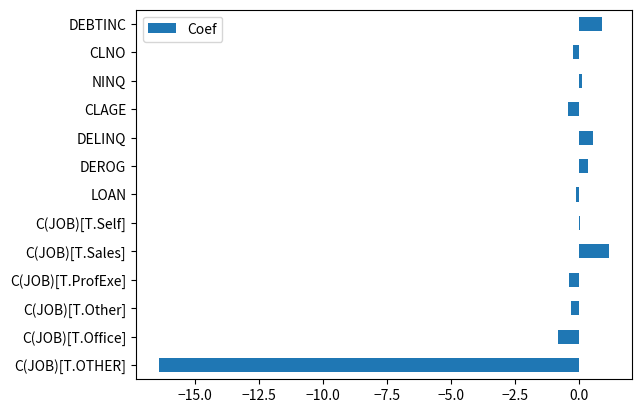

In [ ]:
df_log_scaled_coef=pd.DataFrame({"Coef": scaled_log_result.params.values[1:]}, index=scaled_log_model.exog_names[1:])
df_log_scaled_coef.plot.barh(y="Coef")